c:\Program Files (x86)\Arduino\anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Program Files (x86)\Arduino\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([3, 224, 224])
Имя последнего сверточного слоя: layer4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Предсказанный класс: 225 - malinois


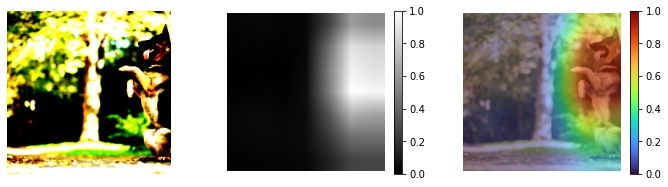

In [1]:
import monai
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from PIL import Image


def cam_gradcam(inferer, data, class_names):
    device = 'cpu'
    output = model(data.unsqueeze(0).to(device))
    inf = inferer(data.unsqueeze(0).to(device), model)
    blended_image = monai.visualize.utils.blend_images(
        data, inf.squeeze(0), cmap='turbo_r')
    fig, ax = plt.subplots(1,3, figsize=(12, 3))
    img = data
    im_res = inf.squeeze(0)

    ax[0].imshow((img).permute(1, 2, 0).numpy())
    ax[0].axis('off')
    ax[1].imshow(np.array(torch.ones((224,224,3)) - im_res.permute(1,2,0)), cmap='gray')
    ax[1].axis('off')
    fig.colorbar(plt.cm.ScalarMappable(cmap='gray'), ax=ax[1])
    ax[2].imshow(np.array(blended_image.permute(1,2,0)))
    ax[2].axis('off')
    fig.colorbar(plt.cm.ScalarMappable(cmap='turbo'), ax=ax[2])

    n_answer = int(torch.argmax(output))
    print(f'Предсказанный класс: {n_answer} - {class_names[n_answer]}')

    return im_res

# Загрузка списка классов из файла
class_names = []
with open('imagenet-classes.txt', 'r') as file:
    class_names = [line.strip() for line in file.readlines()]


# Загрузка предобученной модели ResNet
model = models.resnet18(pretrained=True)
model.eval()

# Выбор файла
image_path = '2.jpeg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image = preprocess(image)
print(image.shape)

# Выбор слоя для интерпретации:
layer_names = [name for name, _ in model.named_children()]
# Имя последнего сверточного слоя
last_conv_layer_name = layer_names[-3]  # -3, так как последний слой - классификатор
print("Имя последнего сверточного слоя:", last_conv_layer_name)

inferer = monai.inferers.SaliencyInferer('GradCAM','layer4',
                                         class_idx=[225])

cam_gradcam(inferer, image, class_names);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Предсказанный класс: 257 - Great Pyrenees


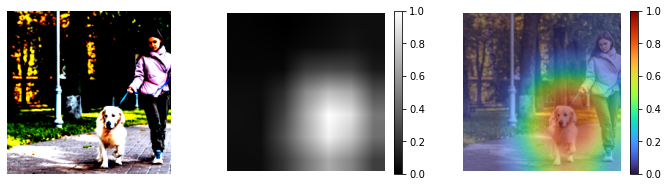

In [3]:
# Выбор файла
image_path = '1.jpg'
image = Image.open(image_path)
image = preprocess(image)

inferer = monai.inferers.SaliencyInferer('GradCAM','layer4',
                                         class_idx=[257])

cam_gradcam(inferer, image, class_names);